# Linear Regression - Chronotype

In [3]:
import os,sys
import numpy as np
import pandas as pd
import pylab as plt
from scipy import stats
from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf

src_dir = os.path.abspath(os.pardir)
sys.path[0] = src_dir

from analysis.CodingScoring import scoreTIPI, normTIPI, stratTIPI
plt.style.use('dark_background')

src_dir

'/Users/melissawessel/Documents/dev/python/personality-stratification'

In [4]:
questions = pd.read_csv('../data/External/dataHeadings.csv')
dataRaw = pd.read_csv('../data/External/dataRaw.csv', names=questions.QuestionCode)
dataRaw.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C+,S-,O+,E-,A+,C-,S+,O-,HonestyCheck,FreeText
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree strongly,Agree slightly,Agree strongly,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Agree strongly,Agree slightly,Agree slightly,Disagree slightly,Agree moderately,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree moderately,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Agree slightly,Yes,NaN
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Agree moderately,Disagree moderately,Agree moderately,Disagree slightly,Disagree slightly,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Agree slightly,Agree slightly,Neither agree nor disagree,Agree slightly,Agree moderately,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN


In [5]:
df = dataRaw.join(normTIPI(scoreTIPI(dataRaw)))
df.head()

,Start Date,End Date,DressColor,DressColorOther,DressShadow,DressShadowOther,DressLight,DressTrueColors,DressTrueColorsOther,JacketColor,...,C-,S+,O-,HonestyCheck,FreeText,O,C,E,A,S
0,10/14/17 0:50,10/14/17 0:59,White/Gold,NaN,Yes,NaN,Artificial light,No,NaN,Other (please specify),...,Agree moderately,Agree slightly,Disagree moderately,Yes,Best of luck!,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,10/14/17 0:30,10/14/17 0:40,NaN,Switches from blue/black to blue/gold,No,NaN,Artificial light,No,NaN,Other (please specify),...,Disagree strongly,Agree moderately,Disagree strongly,Yes,Hope research is going well!! Good luck!,0.432133,1.664499,0.662877,-0.578990,0.096085
2,10/14/17 0:00,10/14/17 0:04,Blue/Black,NaN,No,NaN,Artificial light,No,NaN,Blue and white,...,Agree slightly,Agree slightly,Agree slightly,Yes,NaN,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,10/13/17 23:38,10/13/17 23:45,White/Gold,NaN,Yes,NaN,Natural light,No,NaN,Green and gold,...,Disagree moderately,Agree moderately,Neither agree nor disagree,Yes,I'm an engineer and would love to see the data...,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,10/13/17 23:24,10/13/17 23:30,White/Gold,NaN,No,NaN,Natural light,No,NaN,Other (please specify),...,Neither agree nor disagree,Agree slightly,Agree slightly,Yes,NaN,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


In [7]:
cxOCEAS = df[['Chronotype','O','C','E','A','S']]
cxOCEAS.to_csv('chronotypeOCEAS.csv')
cxOCEAS.head()

,Chronotype,O,C,E,A,S
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,-0.242004
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,0.096085
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,-0.242004
3,Lark,-0.445830,0.957585,0.031205,-1.802382,1.110352
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,-0.242004


In [5]:
m = cxOCEAS.groupby(['Chronotype']).mean()

In [7]:
m

,O,C,E,A,S
Chronotype,,,,,
Lark,-0.250813,0.451232,-0.198122,0.164111,0.188074
Owl,-0.222538,0.151161,-0.231596,0.072580,0.099233
Strong lark,-0.239012,0.596748,-0.232154,0.164584,0.223488
Strong owl,-0.062307,-0.081510,-0.247742,-0.020602,-0.042507


Graph reveals trends for most traits x chronotype

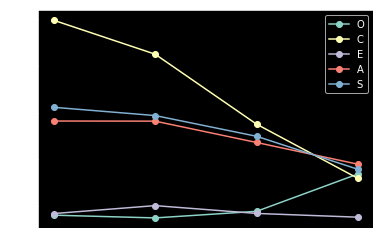

In [6]:
plt.plot(m.loc[['Strong lark','Lark','Owl','Strong owl']], marker='o')
plt.legend(['O','C','E','A','S'])

One way ANOVA on each trait

In [9]:
for trait in ['S','E','O','A','C']:
    sl = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong lark'].dropna()
    l = cxOCEAS[trait][cxOCEAS['Chronotype']=='Lark'].dropna()
    o = cxOCEAS[trait][cxOCEAS['Chronotype']=='Owl'].dropna()
    so = cxOCEAS[trait][cxOCEAS['Chronotype']=='Strong owl'].dropna()
    f_val, p_val = stats.f_oneway(sl,l,o,so)
    print('F=%f, p=%f'%(f_val,p_val))
    
# bonferroni correction alpha .05/5 = .01

F=42.857438, p=0.000000
F=1.638169, p=0.178211
F=30.401000, p=0.000000
F=26.590246, p=0.000000
F=300.886551, p=0.000000


In [6]:
cxOCEAS['N'] = 0-cxOCEAS['S']
cxOCEAN = cxOCEAS.drop(columns=['S']).dropna()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
cxOCEAN_strat = stratTIPI(stratTIPI(cxOCEAN,3),2)

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
cxOCEAN_strat.head()

,Chronotype,O,C,E,A,N,O_strat,C_strat,E_strat,A_strat,N_strat,O_bistrat,C_bistrat,E_bistrat,A_bistrat,N_bistrat
0,Strong owl,0.871115,-1.163156,0.347041,-0.578990,0.242004,0,-1,0,0,0,1,-1,1,-1,1
1,Strong owl,0.432133,1.664499,0.662877,-0.578990,-0.096085,0,1,0,0,0,1,1,1,-1,-1
2,Owl,-0.884811,-0.456242,0.031205,-0.986787,0.242004,0,0,0,0,0,-1,-1,1,-1,1
3,Lark,-0.445830,0.957585,0.031205,-1.802382,-1.110352,0,0,0,-1,-1,-1,1,1,-1,-1
4,Lark,-1.762774,-0.102785,-0.916303,0.644401,0.242004,-1,0,0,0,0,-1,-1,-1,1,1


In [9]:
df = cxOCEAN_strat.replace(['Strong owl','Owl','Lark','Strong lark'],[1,2,3,4])

### Regression

Continuous multiple regression (OLS)

In [10]:
X = df[['O','C','E','A','N']].values
y = df['Chronotype'].values
y

array([1, 1, 2, ..., 2, 2, 3])

In [11]:
regr = OLS(y, add_constant(X)).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     202.0
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          2.34e-209
Time:                        12:14:12   Log-Likelihood:                -19874.
No. Observations:               15539   AIC:                         3.976e+04
Df Residuals:                   15533   BIC:                         3.981e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1539      0.007    290.541      0.000       2.139       2.168
x1            -0.0625      0.007     -8.427      0.000      -0.077      -0.048
x2             0.2017      0.007     26.984      0.000       0.187       0.216
x3             0.0200      0.007      2.959      0.003       0.007       0.033
x4             0.0477      0.007      6.601      0.000       0.034       0.062
x5            -0.0258      0.007     -3.549      0.000      -0.040      -0.012
==============================================================================
Omnibus:                      649.443   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              382.044
Skew:                           0.239   Prob(JB):                     1.10e-83
Kurtosis:                       2.399   Cond. No.                         1.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Tristrat multiple regression (OLS)

In [12]:
X = df[['O_strat','C_strat','E_strat','A_strat','N_strat']].values
y = df['Chronotype'].values

In [13]:
regr = OLS(y, add_constant(X)).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          2.04e-159
Time:                        12:14:16   Log-Likelihood:                -19989.
No. Observations:               15539   AIC:                         3.999e+04
Df Residuals:                   15533   BIC:                         4.004e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1689      0.008    283.310      0.000       2.154       2.184
x1            -0.1061      0.014     -7.525      0.000      -0.134      -0.078
x2             0.3031      0.013     23.794      0.000       0.278       0.328
x3             0.0344      0.012      2.985      0.003       0.012       0.057
x4             0.0668      0.012      5.489      0.000       0.043       0.091
x5            -0.0499      0.012     -4.247      0.000      -0.073      -0.027
==============================================================================
Omnibus:                      762.125   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.297
Skew:                           0.235   Prob(JB):                     4.87e-90
Kurtosis:                       2.357   Cond. No.                         2.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
.047/.061

0.7704918032786885

In [27]:
3.976/3.999

0.9942485621405351

In [45]:
3.981/4.004

0.9942557442557444

Bistrat mulitple regression (OLS)

In [14]:
X = df[['O_bistrat','C_bistrat','E_bistrat','A_bistrat','N_bistrat']].values
y = df['Chronotype'].values

In [15]:
regr = OLS(y, add_constant(X)).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     139.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          3.86e-145
Time:                        12:14:52   Log-Likelihood:                -20022.
No. Observations:               15539   AIC:                         4.006e+04
Df Residuals:                   15533   BIC:                         4.010e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1709      0.007    294.739      0.000       2.156       2.185
x1            -0.0534      0.007     -7.228      0.000      -0.068      -0.039
x2             0.1600      0.007     22.075      0.000       0.146       0.174
x3             0.0107      0.007      1.487      0.137      -0.003       0.025
x4             0.0462      0.007      6.440      0.000       0.032       0.060
x5            -0.0393      0.007     -5.388      0.000      -0.054      -0.025
==============================================================================
Omnibus:                      781.151   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              433.547
Skew:                           0.254   Prob(JB):                     7.19e-95
Kurtosis:                       2.358   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interaction

In [34]:
X_triStrat = df[['Chronotype','O_strat','C_strat','E_strat','A_strat','N_strat']]
X_triStrat.columns = ['Chronotype','O','C','E','A','N']
X_continuous = df[['Chronotype','O','C','E','A','N']]

In [35]:
X_triStrat['StratCondition'] = 0
X_continuous['StratCondition'] = 1

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# X = np.concatenate((X_triStrat.values,X_continuous.values))
X = pd.concat((X_triStrat,X_continuous))
X

,Chronotype,O,C,E,A,N,StratCondition
0,1,0.000000,-1.000000,0.000000,0.000000,0.000000,0
1,1,0.000000,1.000000,0.000000,0.000000,0.000000,0
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,3,0.000000,0.000000,0.000000,-1.000000,-1.000000,0
4,3,-1.000000,0.000000,0.000000,0.000000,0.000000,0
5,2,-1.000000,0.000000,0.000000,0.000000,0.000000,0
6,2,1.000000,0.000000,0.000000,0.000000,0.000000,0
7,3,1.000000,0.000000,1.000000,0.000000,1.000000,0
8,2,0.000000,0.000000,-1.000000,0.000000,-1.000000,0
9,1,-1.000000,1.000000,-1.000000,-1.000000,0.000000,0


In [33]:
# y = np.concatenate((df['Chronotype'].values,df['Chronotype'].values))
# y = pd.concat((df['Chronotype'],df['Chronotype']))

In [44]:
regr = smf.ols(formula='Chronotype ~ O * StratCondition + C * StratCondition + E * StratCondition + A * StratCondition + N * StratCondition', data = X).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Chronotype   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     161.3
Date:                Mon, 01 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:50:00   Log-Likelihood:                -39864.
No. Observations:               31078   AIC:                         7.975e+04
Df Residuals:                   31066   BIC:                         7.985e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1689      0.008    284.361      0.000       2.154       2.184
O                   -0.1061      0.014     -7.553      0.000      -0.134      -0.079
StratCondition      -0.0149      0.011     -1.400      0.162      -0.036       0.006
O:StratCondition     0.0436      0.016      2.742      0.006       0.012       0.075
C                    0.3031      0.013     23.882      0.000       0.278       0.328
C:StratCondition    -0.1014      0.015     -6.875      0.000      -0.130      -0.072
E                    0.0344      0.011      2.996      0.003       0.012       0.057
E:StratCondition    -0.0144      0.013     -1.079      0.280      -0.041       0.012
A                    0.0668      0.012      5.509      0.000       0.043       0.091
A:StratCondition    -0.0191      0.014     -1.354      0.176      -0.047       0.009
N                   -0.0499      0.012     -4.263      0.000      -0.073      -0.027
N:StratCondition     0.0241      0.014      1.746      0.081      -0.003       0.051
==============================================================================
Omnibus:                     1408.658   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              793.006
Skew:                           0.237   Prob(JB):                    6.32e-173
Kurtosis:                       2.378   Cond. No.                         5.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""